In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb
from skimage import data
from skimage.color import rgb2hed
from skimage.color import hed2rgb
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import cv2
import tensorflow as tf




In [ ]:
# Then you’ll see a link, click on that link, allow access
# Copy the code that pops up, paste it in the box, hit enter

from google.colab import drive
drive.mount('/content/gdrive')

# Change working directory to be current folder, please keep ''/content/gdrive/My Drive/XXX' in the path and change XXX to be your own folder.
# The path is case sensitive.
import os
os.chdir('/content/gdrive/My Drive/iss/capstone')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
colab  data


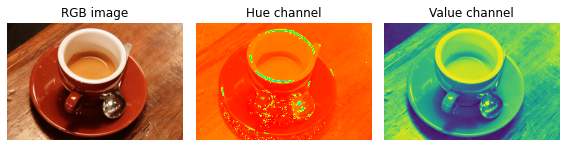

In [ ]:
#have distinct colors (hues) and luminosities

rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

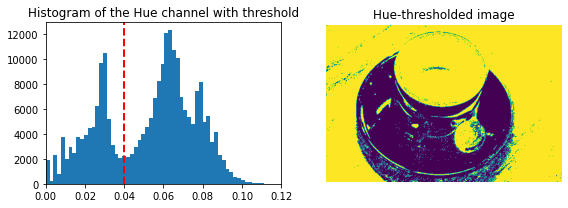

In [ ]:
#separate the cup from the background
hue_threshold = 0.04
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

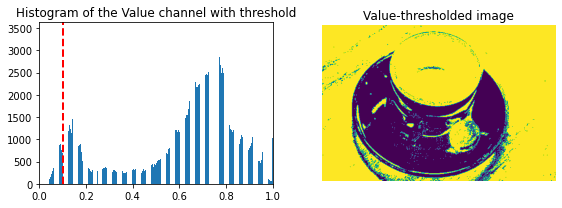

In [ ]:
#additional thresholding on the Value channel to partly remove the shadow of the cup

value_threshold = 0.1
binary_img = (hue_img > hue_threshold) | (value_img < value_threshold)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(value_img.ravel(), 512)
ax0.set_title("Histogram of the Value channel with threshold")
ax0.axvline(x=value_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 1)
ax1.imshow(binary_img)
ax1.set_title("Value-thresholded image")
ax1.axis('off')

fig.tight_layout()

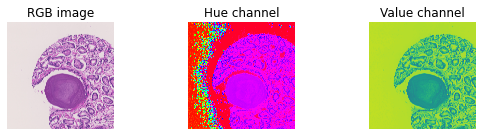

In [ ]:
img = cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

hsv_img = rgb2hsv(img)
hue_img = hsv_img[:, :, 0]
saturation_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()



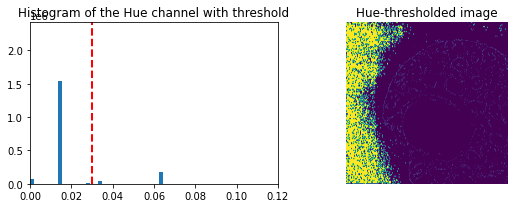

In [ ]:
#separate the cup from the background
hue_threshold = 0.03
binary_img = hue_img > hue_threshold
binary_img = binary_img < 0.065

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

In [ ]:
a=0.05
alpha = random.uniform(1-0.05, 1+0.05)
beta = random.uniform(0-a, a)
      h = hed_img[:, :, 0] * alpha +beta
      e = hed_img[:, :, 1] * alpha +beta
      d=  hed_img[:, :, 2] * alpha +beta

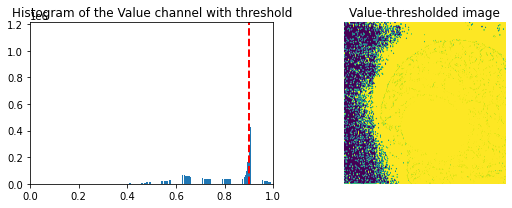

In [ ]:
#additional thresholding on the Value channel to partly remove the shadow of the cup

value_threshold = 0.9
binary_img = hue_img < 0.065
binary_img = (hue_img > hue_threshold ) | (value_img < value_threshold)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(value_img.ravel(), 512)
ax0.set_title("Histogram of the Value channel with threshold")
ax0.axvline(x=value_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 1)
ax1.imshow(binary_img)
ax1.set_title("Value-thresholded image")
ax1.axis('off')

fig.tight_layout()

hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)


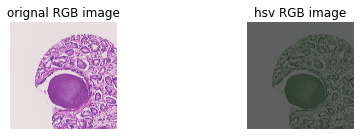

In [ ]:
# For HSV-light and HSV-strong, we used hue and saturation intensity ratios between [−0.1, 0.1] and [−1, 1]
img = cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hsv_img = rgb2hsv(img)

alpha = random.uniform(-1, 1)
h = hsv_img[:, :, 0] * alpha 
s = hsv_img[:, :, 1] * alpha
v =  hsv_img[:, :, 2] * alpha

hsv_new=np.dstack([h, s,v])
print('hsv shape : ',hsv_new.shape)

new_image = hsv2rgb(hsv_new)
print ('new_imag shape: ',new_image.shape)


fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 2))

ax0.imshow(img)
ax0.set_title("orignal RGB image")
ax0.axis('off')
ax1.imshow(new_image, cmap='hsv')
ax1.set_title("hsv RGB image")
ax1.axis('off')

fig.tight_layout()

In [ ]:
# hue, saturation, value colour space
import cv2
import shutil 

np.random.seed(42)
mask_dir= './data/masks/'
mask_aug_dir='./data/masks_aug_hsv/'

def hed_aug(image_path):
  image_aug_folder        = "./data/images_aug_hsv/"
  plt.axis('off')

  for x in range(0, 2):
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    print('image_name : ',image_name)
    image_aug_path  = image_aug_folder+image_name+'_aug_'+str(x)+'.png'

    mask_name='mask_'+image_name+'.png'
    mask_aug_name='mask_'+image_name+'_aug_'+str(x)+'.png'
    mask_aug_path= os.path.join(mask_aug_dir,mask_aug_name)
    print('mask_aug_name : ',mask_aug_path)
    
    #copy mask
    if os.path.isfile(mask_aug_path):
      print (mask_aug_path, 'existed , skipping')
    else:
      shutil.copy2(os.path.join(mask_dir,mask_name),mask_aug_path)

    # generate heg_aug
    if os.path.isfile(image_aug_path):
      print (image_aug_path, 'existed , skipping')
    else:
      ihc= cv2.imread(image_path, cv2.IMREAD_COLOR)
      ihc = cv2.cvtColor(ihc,cv2.COLOR_BGR2RGB)
      print('ihc shape :',ihc.shape)
      hsv_img = rgb2hsv(ihc)

      alpha = random.uniform(-1, 1)
      h = hsv_img[:, :, 0] * alpha 
      s = hsv_img[:, :, 1] * alpha
      v =  hsv_img[:, :, 2] 

      hsv_new=np.dstack([h, s,v])
      print('hsv shape : ',hsv_new.shape)

      new_image = hsv2rgb(hsv_new)
      print ('new_imag shape: ',new_image.shape)
      imgplot = plt.imshow(new_image)
      #plt.show()

      print('image_aug_path : ',image_aug_path)
      plt.savefig(image_aug_path, transparent = True, bbox_inches = 'tight', pad_inches = 0)


In [ ]:
import os
rootdir = './data/images/'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        hed_aug(os.path.join(subdir, file))

image_name :  ZT111_4_A_3_9
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_A_3_9_aug_0.png
./data/masks_aug_hsv/mask_ZT111_4_A_3_9_aug_0.png existed , skipping
./data/images_aug_hsv/ZT111_4_A_3_9_aug_0.png existed , skipping
image_name :  ZT111_4_A_3_9
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_A_3_9_aug_1.png
./data/masks_aug_hsv/mask_ZT111_4_A_3_9_aug_1.png existed , skipping
./data/images_aug_hsv/ZT111_4_A_3_9_aug_1.png existed , skipping
image_name :  ZT111_4_A_1_2
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_A_1_2_aug_0.png
./data/masks_aug_hsv/mask_ZT111_4_A_1_2_aug_0.png existed , skipping
./data/images_aug_hsv/ZT111_4_A_1_2_aug_0.png existed , skipping
image_name :  ZT111_4_A_1_2
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_A_1_2_aug_1.png
./data/masks_aug_hsv/mask_ZT111_4_A_1_2_aug_1.png existed , skipping
./data/images_aug_hsv/ZT111_4_A_1_2_aug_1.png existed , skipping
image_name :  ZT111_4_A_3_4
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_A_3_4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_8_aug_0.png
image_name :  ZT111_4_C_5_8
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_8_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_8_aug_1.png
image_name :  ZT111_4_C_5_12
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_12_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_12_aug_0.png
image_name :  ZT111_4_C_5_12
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_12_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_12_aug_1.png
image_name :  ZT111_4_C_4_6
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_4_6_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_4_6_aug_0.png
image_name :  ZT111_4_C_4_6
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_4_6_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_4_6_aug_1.png
image_name :  ZT111_4_C_4_9
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_4_9_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_4_9_aug_0.png
image_name :  ZT111_4_C_4_9
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_4_9_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_4_9_aug_1.png
image_name :  ZT111_4_C_6_13
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_6_13_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_6_13_aug_0.png
image_name :  ZT111_4_C_6_13
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_6_13_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_6_13_aug_1.png
image_name :  ZT111_4_C_5_2
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_2_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_2_aug_0.png
image_name :  ZT111_4_C_5_2
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_2_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_2_aug_1.png
image_name :  ZT111_4_C_6_2
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_6_2_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_6_2_aug_0.png
image_name :  ZT111_4_C_6_2
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_6_2_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_6_2_aug_1.png
image_name :  ZT111_4_C_4_12
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_4_12_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_4_12_aug_0.png
image_name :  ZT111_4_C_4_12
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_4_12_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_4_12_aug_1.png
image_name :  ZT111_4_C_6_5
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_6_5_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_6_5_aug_0.png
image_name :  ZT111_4_C_6_5
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_6_5_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_6_5_aug_1.png
image_name :  ZT111_4_C_5_5
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_5_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_5_aug_1.png
image_name :  ZT111_4_C_5_10
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_10_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_10_aug_0.png
image_name :  ZT111_4_C_5_10
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_10_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_10_aug_1.png
image_name :  ZT111_4_C_6_6
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_6_6_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_6_6_aug_0.png
image_name :  ZT111_4_C_6_6
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_6_6_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_6_6_aug_1.png
image_name :  ZT111_4_C_4_3
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_4_3_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_4_3_aug_0.png
image_name :  ZT111_4_C_4_3
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_4_3_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_4_3_aug_1.png
image_name :  ZT111_4_C_5_9
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_9_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_9_aug_0.png
image_name :  ZT111_4_C_5_9
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_9_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_9_aug_1.png
image_name :  ZT111_4_C_5_11
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_11_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_11_aug_0.png
image_name :  ZT111_4_C_5_11
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_5_11_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_5_11_aug_1.png
image_name :  ZT111_4_C_4_4
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_4_4_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_4_4_aug_0.png
image_name :  ZT111_4_C_4_4
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_4_4_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_4_4_aug_1.png
image_name :  ZT111_4_C_8_3
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_8_3_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_8_7_aug_1.png
image_name :  ZT199_1_A_1_11
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT199_1_A_1_11_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT199_1_A_1_11_aug_0.png
image_name :  ZT199_1_A_1_11
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT199_1_A_1_11_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image_aug_path :  ./data/images_aug_hsv/ZT199_1_A_1_11_aug_1.png
image_name :  ZT111_4_C_7_1
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_7_1_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_7_1_aug_0.png
image_name :  ZT111_4_C_7_1
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_7_1_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_7_1_aug_1.png
image_name :  ZT111_4_C_7_4
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_7_4_aug_0.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new_imag shape:  (3100, 3100, 3)
image_aug_path :  ./data/images_aug_hsv/ZT111_4_C_7_4_aug_0.png
image_name :  ZT111_4_C_7_4
mask_aug_name :  ./data/masks_aug_hsv/mask_ZT111_4_C_7_4_aug_1.png
ihc shape : (3100, 3100, 3)
hsv shape :  (3100, 3100, 3)
